## Announcements

- Exam 1 Grades
    - **No grade?** -- email me your name, WiscID, name in Canvas (if different), where you took the exam
    - **Grade dispute?**
          - 2 general questions answer E will also be marked as correct:
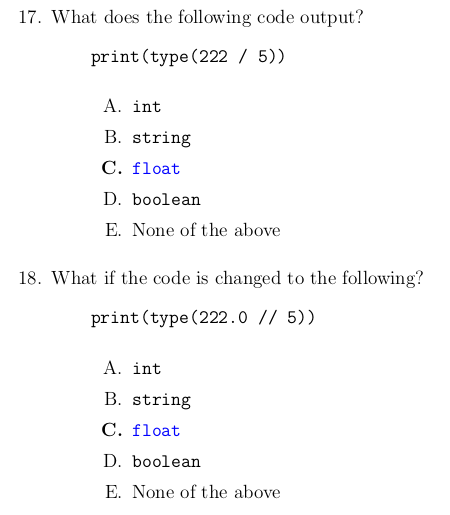

  - **Other exam grade disputes?** -- email me the question and why you think your answer should be considered correct.

In [1]:
import csv
import json # today's topic!

In [2]:
# Read in the csv survey data data and the cell function.

# source:  Automate the Boring Stuff with Python
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

cs220_csv = process_csv('cs220_survey_data.csv')
cs220_header = cs220_csv[0]
cs220_data = cs220_csv[1:]

def cell(row_idx, col_name):
    col_idx = cs220_header.index(col_name)
    val = cs220_data[row_idx][col_idx]
    if val == "":
        return None
    elif col_name == "Age":
        if "." in val:
            return None
        return int(val)
    elif col_name == 'Latitude' or col_name == 'Longitude':
        return float(val)
    else:
        return val


## Warmup

In [5]:
# Warmup 1: Put survey_data into buckets by lecture
#   Make a dictionary of lists
#   Key is the lecture
#   Value is the list of students, where each student is a dictionary

lecture_dict = {}
for i in range(len(cs220_data)):
    current_student = cs220_data[i]
    current_lecture = cell(i, 'Lecture')
    if current_lecture not in lecture_dict:
        lecture_dict[current_lecture] = []
    current_student = {}
    for header_value in cs220_header:
        current_student[header_value] = cell(i, header_value)
    lecture_dict[current_lecture].append(current_student)
# lecture_dict

In [6]:
# Warmup 2: Find the average, min, and max age for our lecture (LEC004)

people_age = []
for person in lecture_dict["LEC004"]:
    current_age = person['Age']
    if current_age != None:
        current_age = int(current_age)
        people_age.append(current_age)
    
print(min(people_age))
print(max(people_age))
print(sum(people_age) / len(people_age))


17
28
19.09004739336493


In [7]:
# Warmup 3: Make a dictionary of each lecture's average age
# The key is the lecture name
# The value is the average age

lec_age_dict = {}
for lec in lecture_dict:
    current_lec_ages = []
    for person in lecture_dict[lec]:
        current_age = person['Age']
        if current_age != None:
            current_age = int(current_age)
            current_lec_ages.append(current_age)
    lec_age_dict[lec] = sum(current_lec_ages) / len(current_lec_ages)
lec_age_dict

{'LEC004': 19.09004739336493,
 'LEC002': 19.476190476190474,
 'LEC001': 19.093617021276597,
 'LEC003': 19.219917012448132}

In [8]:
# Warmup 4: Same thing as before except...
# The key is the lecture name
# The value is a dictionary (nested dictionary!)
#  ... with keys 'avg', 'min', and 'max'

lec_age_dict = {}
for lec in lecture_dict:
    current_lec_ages = []
    for person in lecture_dict[lec]:
        current_age = person['Age']
        if current_age != None:
            current_age = int(current_age)
            current_lec_ages.append(current_age)
    lec_age_dict[lec] = {}
    lec_age_dict[lec]['avg'] = sum(current_lec_ages) / len(current_lec_ages)
    lec_age_dict[lec]['min'] = min(current_lec_ages)
    lec_age_dict[lec]['max'] = max(current_lec_ages)
lec_age_dict

{'LEC004': {'avg': 19.09004739336493, 'min': 17, 'max': 28},
 'LEC002': {'avg': 19.476190476190474, 'min': 0, 'max': 31},
 'LEC001': {'avg': 19.093617021276597, 'min': 17, 'max': 31},
 'LEC003': {'avg': 19.219917012448132, 'min': 17, 'max': 38}}

# JSON Format

## Reading

- [Sweigart Ch 16](https://automatetheboringstuff.com/2e/chapter16/)


## Learning Objectives
After this lecture you will be able to...
- Interpret JSON formatted data and recognize differences between JSON and Python
- Deserialize data from JSON for use in Python programs (read)
- Serialize data into JSON for long term storage (write) 

Let's look at [lecture slides](./19_JSON.pdf).  Pay particular attention to:

- JSON format comparing *dict of dicts* to *JSON files*
- JSON origin and acronymn
- Minor JavaScript vs. Python differences

In [10]:
# Deserialize
def read_json(path):
    with open(path, encoding="utf-8") as f: # f is a variable 
        return json.load(f)                 # f represents a reference the JSON file
    
# Serialize
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

In [9]:
# first, let's take a look at the file score_history.json

In [11]:
# now let's read it in and investigate the data
scores_dict = read_json('score_history.json')
print(type(scores_dict))
print(scores_dict.keys())
print(scores_dict['bob'])
print(scores_dict)

scores_dict['cole'] = [50.0, 20.0]
print(scores_dict)

<class 'dict'>
dict_keys(['bob', 'alice', 'meena'])
[20.0, 10.0]
{'bob': [20.0, 10.0], 'alice': [30.0, 20.0], 'meena': [100.0, 10.0]}
{'bob': [20.0, 10.0], 'alice': [30.0, 20.0], 'meena': [100.0, 10.0], 'cole': [50.0, 20.0]}


In [12]:
# Let's practice writing to a JSON file
# when I'm testing code, I like to name my output file differently from my input file
# so that I don't accidentally erase or overwrite my data
write_json('score_history2.json', scores_dict)  

### We can make JSON files in many varied ways
### This makes a list of dictionaries

In [14]:
# Code from last lecture, 
# reads in the survey data into a list of dicts
table_dict_list = []
for i in range(len(cs220_data)):
    row = cs220_data[i]
    row_dict = {}
    for item in cs220_header: # iterate through each column name
        row_dict[item] = row[cs220_header.index(item)] # find the value in the row using .index
    
    # add row_dict to table_dict_list
    table_dict_list.append(row_dict)
    
table_dict_list[:3] # what is this? -- look at first 3 rows

[{'Section': 'COMP SCI 220:LEC004, COMP SCI 220:LAB344',
  'Lecture': 'LEC004',
  'Printed Copy': 'No',
  'Age': '19',
  'Primary Major': 'Engineering: Other',
  'Other Majors': 'Engineering Mechanics',
  'Secondary Majors': '',
  'Zip Code': '53726',
  'Latitude': '44.39',
  'Longitude': '-89.83',
  'Data Science Major': 'No',
  'Pizza Topping': 'none (just cheese)',
  'Cats or Dogs': 'dog',
  'Runner': 'No',
  'Sleep Habit': 'night owl',
  'Procrastinator': 'Maybe',
  'Song': 'Family Ties-Baby Keem'},
 {'Section': 'COMP SCI 220:LEC004, COMP SCI 220:LAB341',
  'Lecture': 'LEC004',
  'Printed Copy': 'Yes',
  'Age': '18',
  'Primary Major': 'Business: Finance',
  'Other Majors': '',
  'Secondary Majors': 'economics',
  'Zip Code': '53706',
  'Latitude': '22.7626',
  'Longitude': '120.3652',
  'Data Science Major': 'Maybe',
  'Pizza Topping': 'pineapple',
  'Cats or Dogs': 'dog',
  'Runner': 'Yes',
  'Sleep Habit': 'no preference',
  'Procrastinator': 'Yes',
  'Song': 'Singer: Haruno\n\n

In [15]:
# Let's write this list of dictionaries into a JSON file
write_json('cs220_as_json_list.json', table_dict_list)  

In [16]:
# Verify:  can you find this file in your directory? 

In [17]:
# let's write our original dictionary of lists - buckets into a JSON file
write_json('cs220_as_json_dict.json', lecture_dict)  

In [16]:
# Verify: can you find this file in your directory? 

### Many Web Sites have APIs that allow you to get their data

#### cs571.org

In [18]:
# Read cs571.json data
cs571_data = read_json('cs571.json')
# cs571_data

In [19]:
# What are each of the messages?
cs571_messages = cs571_data['messages']
for msg in cs571_messages:
    print(msg['content'])

hello!
hello!
test
vroom
test
Test
Even MORE generic content
More generic posting content
I need this to be generic content
tttt
i <3 react
so I went running for answers
The evils of lucy was all around me
I didn't want to self destruct
found myself screaming in a hotel room
resentment that turned into a great depressions
abusing my power full of resentment
sometimes I did the same
I remember you was conflicted misusing your influence
r
Hello
hello
You got this!
test again
test


In [20]:
# What are the unique posters?
posters = []
for msg in cs571_messages:
    posters.append(msg['poster'])
posters = list(set(posters))
posters

['k.dot',
 'robert',
 'q',
 'b',
 'user',
 'car',
 'testaccmc1234',
 'chase',
 'g',
 'testtesttest1',
 'krirk1',
 'w',
 'newAnkit']

#### Kiva.com Micro-lending site

In [21]:
# Take a look at kiva.json

# read it into a dictionary
kiva_dict = read_json('kiva.json')
# kiva_dict

In [24]:
# Plumbing the data
loan_list = kiva_dict['data']['lend']['loans']['values'] # this gives us a list of dicts
loan_list

[{'name': 'Polikseni',
  'description': "Polikseni is 70 years old and married. She and her husband are both retired and their main income is a retirement pension of $106 a month for Polikseni and disability income for her husband of $289 a month. <br /><br />Polikseni's husband, even though disabled, works in a very small shop as a watchmaker on short hours, just to provide additional income for his family and to feel useful. Polikseni's husband needs constant medical treatment due to his health problems. She requested another loan, which she will use to continue paying for the therapy her husband needs. With a part of the loan, she is going to pay the remainder of the previous loan.",
  'loanAmount': '1325.00',
  'geocode': {'city': 'Korce',
   'country': {'name': 'Albania',
    'region': 'Eastern Europe',
    'fundsLentInCountry': 9051250}}},
 {'name': 'Safarmo',
  'description': "Safarmo is 47 years old. She lives with her husband and her children in Khuroson district. <br /><br />

In [27]:
# what can we learn from this data?
for loan_dict in loan_list:
    print(type(loan_dict))
    for key in loan_dict:
        print(key)

<class 'dict'>
name
description
loanAmount
geocode
<class 'dict'>
name
description
loanAmount
geocode
<class 'dict'>
name
description
loanAmount
geocode
<class 'dict'>
name
description
loanAmount
geocode
<class 'dict'>
name
description
loanAmount
geocode


In [28]:
# print out all the names
for loan_dict in loan_list:
    print(loan_dict['name'])

Polikseni
Safarmo
Elizabeth
Ester
Cherifa


In [29]:
# print out the total amount to loan
tot_loan_amount = 0.0
for loan_dict in loan_list:
    tot_loan_amount += float(loan_dict['loanAmount'])
tot_loan_amount



4350.0

In [30]:
loan_amounts = []
for loan_dict in loan_list:
    loan_amounts.append(float(loan_dict['loanAmount']))
print(min(loan_amounts))
print(max(loan_amounts))
print(sum(loan_amounts) / len(loan_amounts))

275.0
1325.0
870.0


In [31]:
# print out all the country names
for loan_dict in loan_list:
    print(loan_dict['geocode']['country']['name'])

Albania
Tajikistan
Kenya
Kenya
Togo


In [27]:
# more complex APIs...

# Most require you to sign up and get a key:

# https://developer.nytimes.com/apis
# https://developer.spotify.com/documentation/web-api
# https://developer.twitter.com/apitools/downloader

# Some do not:
# https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-route-patterns/api
# specific route: https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA_TRANS/MapServer/19/query?where=trips_routes_route_id%20%3D%20'80'&outFields=*&outSR=4326&f=json
# specific nyt election data: https://static01.nyt.com/elections-assets/2020/data/api/2020-11-03/state-page/wisconsin.json

In [32]:
# Here is an example of how to download from a URL

import requests

url = "https://filesamples.com/samples/code/json/sample2.json"
r = requests.get(url)
data = r.json()

data

{'firstName': 'Joe',
 'lastName': 'Jackson',
 'gender': 'male',
 'age': 28,
 'address': {'streetAddress': '101', 'city': 'San Diego', 'state': 'CA'},
 'phoneNumbers': [{'type': 'home', 'number': '7349282382'}]}